Epoch 1/100
36/36 [==============================] - 15s 208ms/step - loss: 0.0498 - mean_absolute_error: 0.15741s - loss: 0.0545 - mean_absolute_error: 
Epoch 2/100
36/36 [==============================] - 7s 202ms/step - loss: 0.0125 - mean_absolute_error: 0.0846 5s - loss: 0.0105 -
Epoch 3/100
36/36 [==============================] - 7s 208ms/step - loss: 0.0098 - mean_absolute_error: 0.0775
Epoch 4/100
36/36 [==============================] - 7s 201ms/step - loss: 0.0094 - mean_absolute_error: 0.0739
Epoch 5/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0084 - mean_absolute_error: 0.0696 3s - loss: 0.0083 - mean_absolu
Epoch 6/100
36/36 [==============================] - 8s 217ms/step - loss: 0.0082 - mean_absolute_error: 0.0682
Epoch 7/100
36/36 [==============================] - 7s 208ms/step - loss: 0.0073 - mean_absolute_error: 0.0650
Epoch 8/100
36/36 [==============================] - 7s 200ms/step - loss: 0.0063 - mean_absolute_error: 0.0604 5s - loss:

36/36 [==============================] - 9s 254ms/step - loss: 0.0019 - mean_absolute_error: 0.0327
Epoch 71/100
36/36 [==============================] - 9s 258ms/step - loss: 0.0015 - mean_absolute_error: 0.0287
Epoch 72/100
36/36 [==============================] - 10s 278ms/step - loss: 0.0016 - mean_absolute_error: 0.0300
Epoch 73/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0015 - mean_absolute_error: 0.0296
Epoch 74/100
36/36 [==============================] - 8s 210ms/step - loss: 0.0014 - mean_absolute_error: 0.0285
Epoch 75/100
36/36 [==============================] - 9s 256ms/step - loss: 0.0017 - mean_absolute_error: 0.0306
Epoch 76/100
36/36 [==============================] - 7s 198ms/step - loss: 0.0015 - mean_absolute_error: 0.0287 1s - loss: 0.0015 - mean_absolute_error
Epoch 77/100
36/36 [==============================] - 8s 223ms/step - loss: 0.0016 - mean_absolute_error: 0.0306 4s - loss: 0.0016 - mean_absolute_error: - ETA: 2s - loss: 0.0016 - 

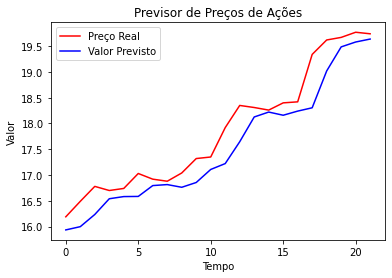

In [15]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
import matplotlib.pyplot as plt

base = pd.read_csv('petr4-treinamento.csv')
base = base.dropna()
base_treino = base.iloc[:, 1:2].values
normalizador = MinMaxScaler(feature_range = (0,1))
base_treino_normalizada = normalizador.fit_transform(base_treino)

previsores = []
preco_real = []

for i in range(90,1242):
    previsores.append(base_treino_normalizada[i-90:i,0])
    preco_real.append(base_treino_normalizada[i,0])
    
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores,(previsores.shape[0], previsores.shape[1],1))

regressor = Sequential()
regressor.add(LSTM(units = 100,
                   return_sequences = True,
                   input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50,
                   return_sequences = True,))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1,
                    activation = 'linear'))
regressor.compile(optimizer = 'rmsprop',
                  loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores,
              preco_real,
              epochs = 100,
              batch_size = 32)

base_teste = pd.read_csv('petr4-teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

previsores_teste = []
for j in range(90,112):
    previsores_teste.append(entradas[j-90:j, 0])
previsores_teste = np.array(previsores_teste)
previsores_teste = np.reshape(previsores_teste,
                              (previsores_teste.shape[0],
                               previsores_teste.shape[1],
                               1))
previsores_teste = regressor.predict(previsores_teste)
previsores_teste = normalizador.inverse_transform(previsores_teste)
previsores_teste.mean()
preco_real_teste.mean()

plt.plot(preco_real_teste,
         color = 'red',
         label = 'Preço Real')
plt.plot(previsores_teste,
         color = 'blue',
         label = 'Valor Previsto')
plt.title('Previsor de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()